# 1. Анализ данных

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv('car_price.csv')

In [58]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Зависимость цены от марки автомобиля

Вероятнее всего, цена автомобиля сильно зависит от его марки. Поэтому выделим марку автомобиля из названия модели. Также исправим написанные с ошибками названия марок.

In [60]:
data['Brand'] = ""
data['Brand'] = data['CarName'].map(lambda s: s.split()[0].lower())\
    .replace(['vw', 'vokswagen', 'toyouta', 'porcshce', 'maxda', 'alfa-romero'], ['volkswagen', 'volkswagen', 'toyota', 'porsche', 'mazda', 'alfa-romeo'])

In [61]:
data['Brand']

0      alfa-romeo
1      alfa-romeo
2      alfa-romeo
3            audi
4            audi
          ...    
200         volvo
201         volvo
202         volvo
203         volvo
204         volvo
Name: Brand, Length: 205, dtype: object

Убедимся в зависимости цены от марки с помощью графика:

<AxesSubplot:title={'center':'price'}, xlabel='Brand'>

<Figure size 640x480 with 0 Axes>

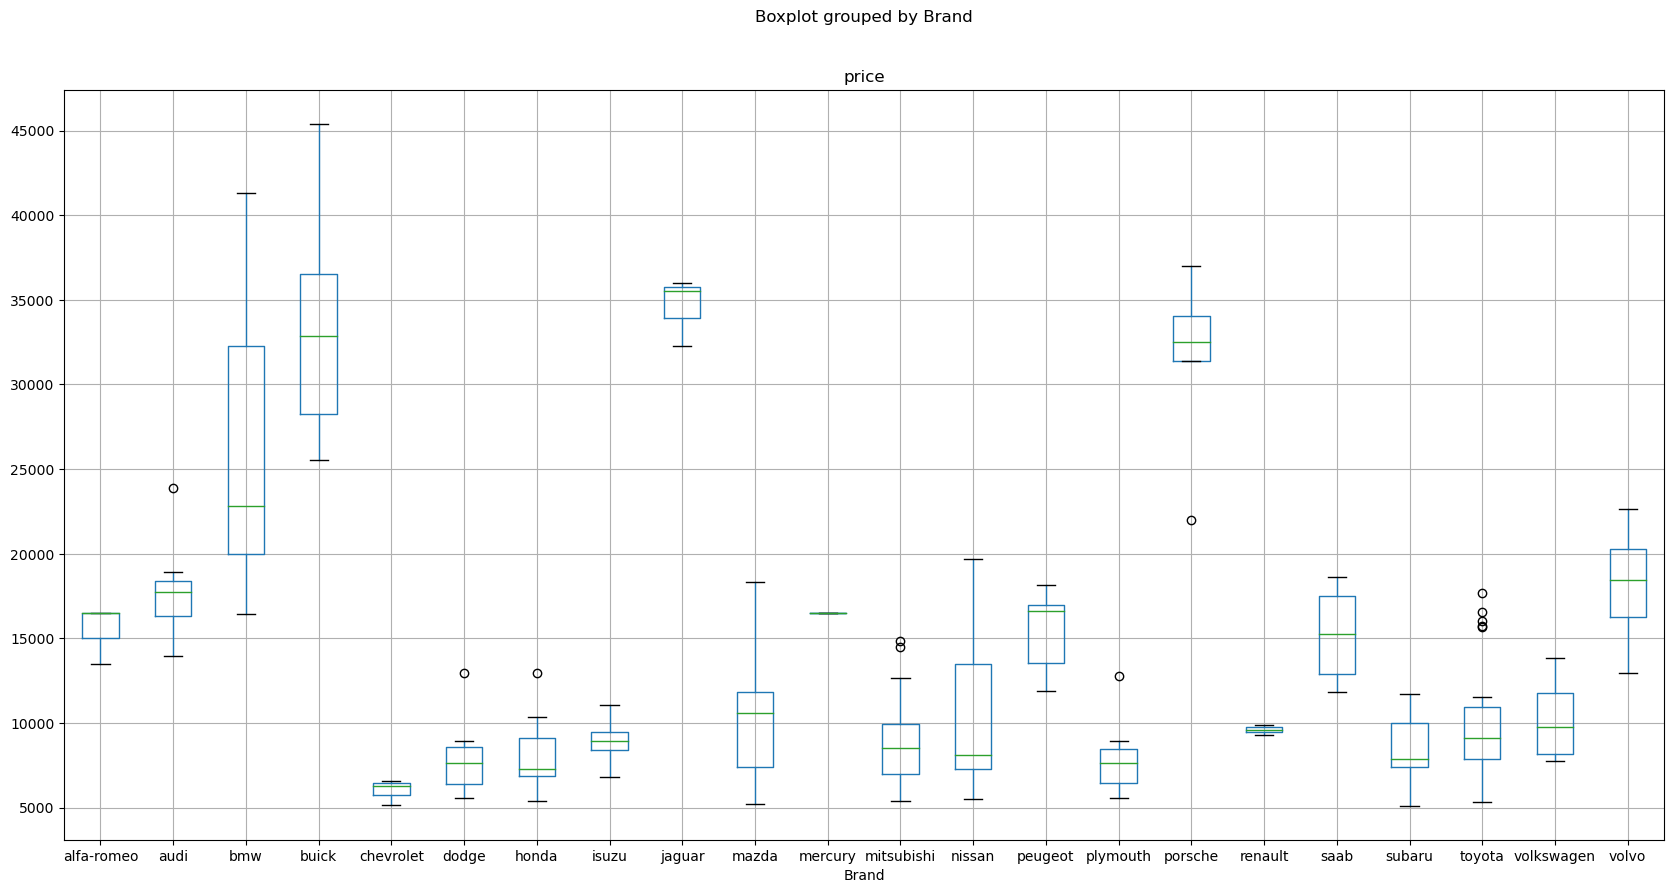

In [62]:
plt.figure()
data.boxplot('price', 'Brand', figsize=(20,10))

Заметим, что в выборке есть несколько марок автомобилей, которые можно назвать "премиальными": все модели такой марки из выборки стоят больше 15000 единиц. Так как мы будем обучать линейную модель, для простоты преобразуем признак 'Brand' в бинарный признак 'IsPremium':

In [63]:
data['IsPremium'] = 0
data['IsPremium'] = data['Brand'].map(lambda s: 1 if s in ['bmw', 'buick', 'jaguar', 'porsche'] else 0)

<AxesSubplot:title={'center':'price'}, xlabel='IsPremium'>

<Figure size 640x480 with 0 Axes>

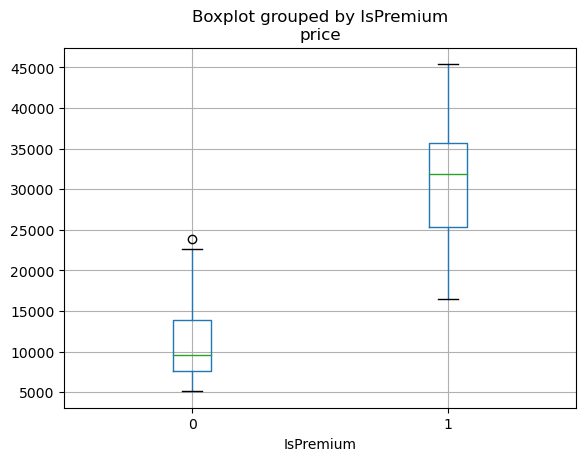

In [64]:
plt.figure()
data.boxplot('price', 'IsPremium')

Признаки CarName и Brand далее исключим из выборки.

## Преобразование оставшихся категориальных признаков

Проверим зависимость цены от категориальных признаков

<AxesSubplot:title={'center':'price'}, xlabel='symboling'>

<Figure size 640x480 with 0 Axes>

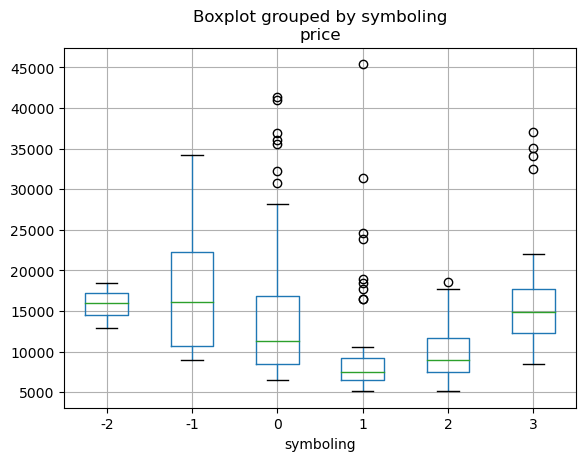

In [65]:
plt.figure()
data.boxplot('price', 'symboling')

<AxesSubplot:xlabel='symboling', ylabel='count'>

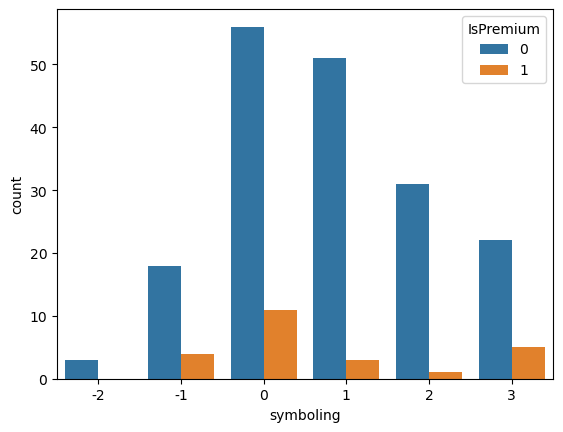

In [66]:
sns.countplot('symboling', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='doornumber'>

<Figure size 640x480 with 0 Axes>

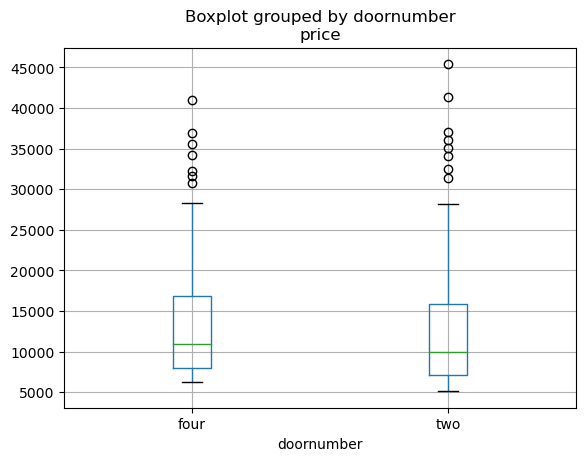

In [67]:
plt.figure()
data.boxplot('price', 'doornumber')

<AxesSubplot:xlabel='doornumber', ylabel='count'>

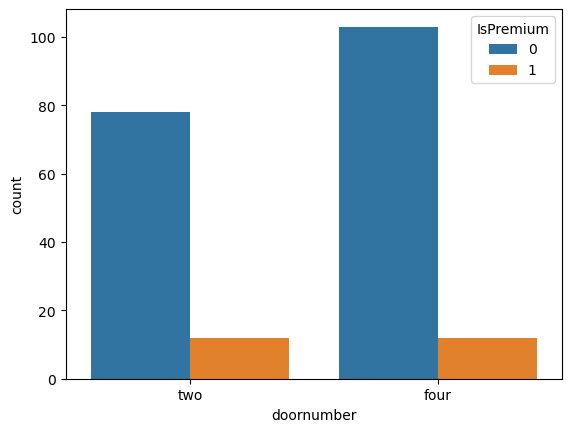

In [68]:
sns.countplot('doornumber', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='fueltype'>

<Figure size 640x480 with 0 Axes>

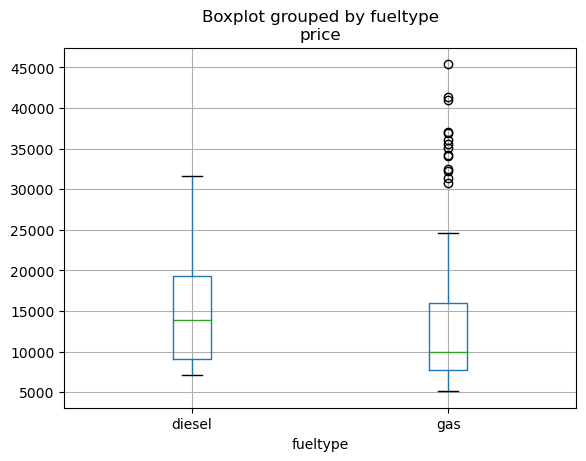

In [69]:
plt.figure()
data.boxplot('price', 'fueltype')

<AxesSubplot:xlabel='fueltype', ylabel='count'>

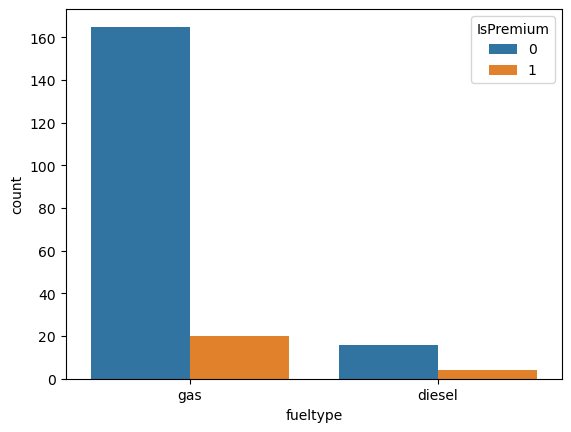

In [70]:
sns.countplot('fueltype', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='aspiration'>

<Figure size 640x480 with 0 Axes>

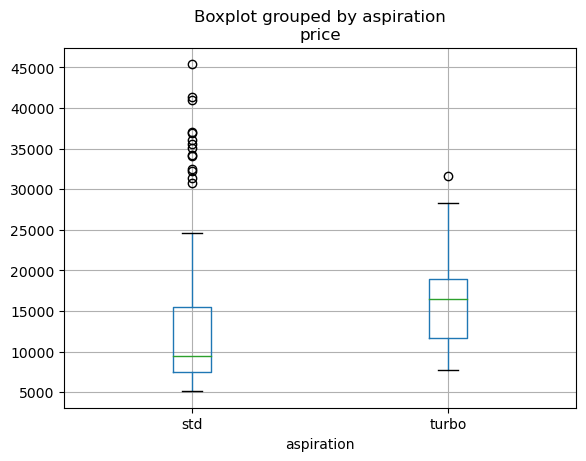

In [71]:
plt.figure()
data.boxplot('price', 'aspiration')

<AxesSubplot:xlabel='aspiration', ylabel='count'>

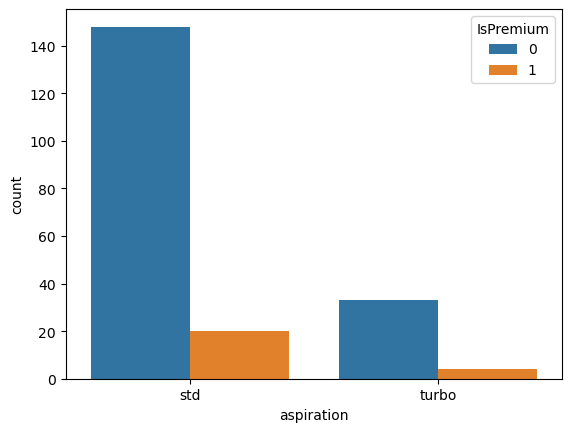

In [72]:
sns.countplot('aspiration', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='enginelocation'>

<Figure size 640x480 with 0 Axes>

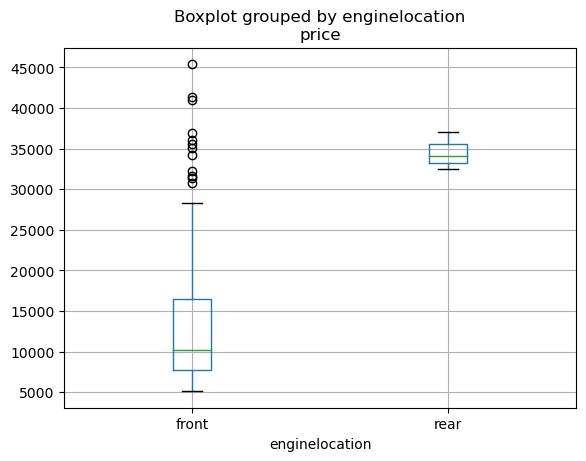

In [73]:
plt.figure()
data.boxplot('price', 'enginelocation')

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

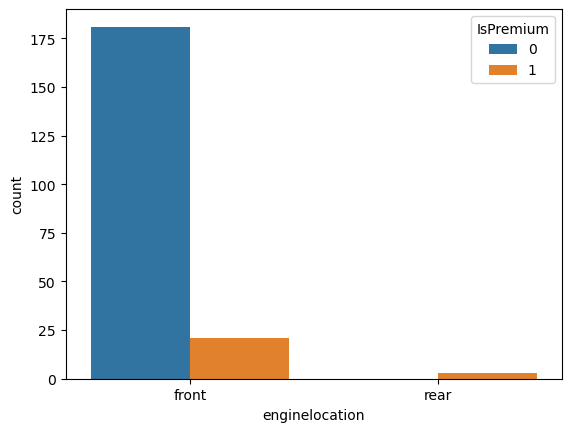

In [74]:
sns.countplot('enginelocation', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='drivewheel'>

<Figure size 640x480 with 0 Axes>

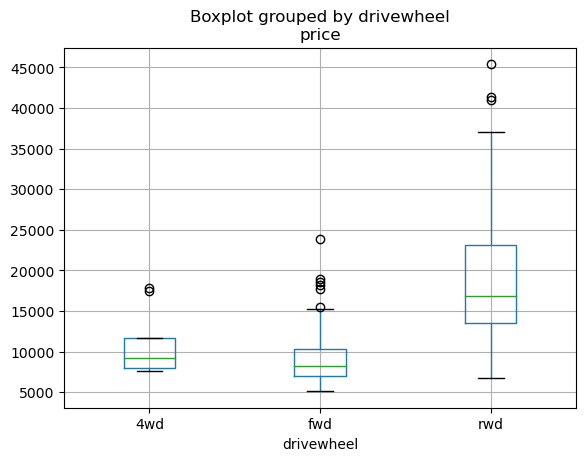

In [75]:
plt.figure()
data.boxplot('price', 'drivewheel')

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

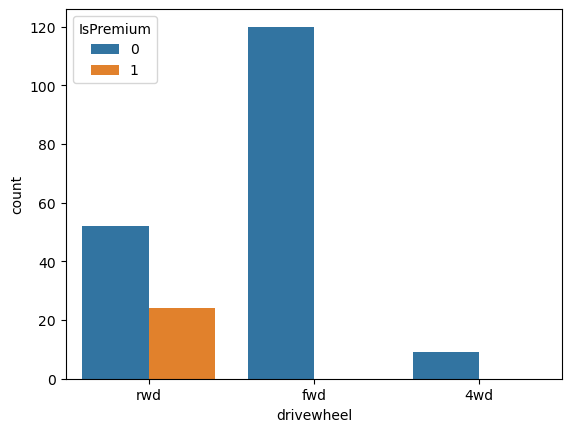

In [76]:
sns.countplot('drivewheel', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='fuelsystem'>

<Figure size 640x480 with 0 Axes>

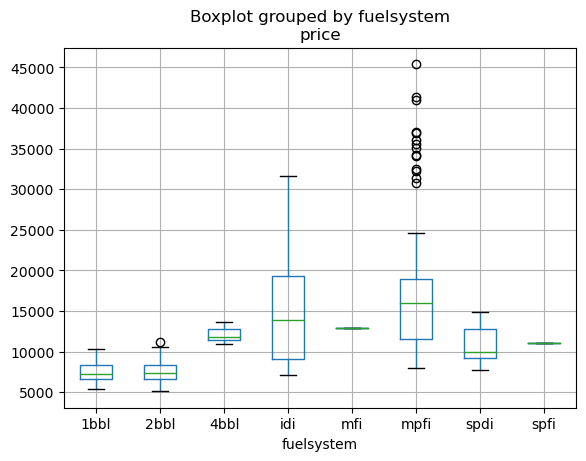

In [77]:
plt.figure()
data.boxplot('price', 'fuelsystem')

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

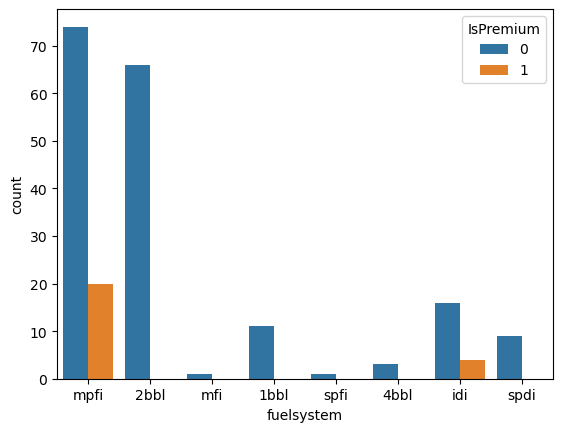

In [78]:
sns.countplot('fuelsystem', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='carbody'>

<Figure size 640x480 with 0 Axes>

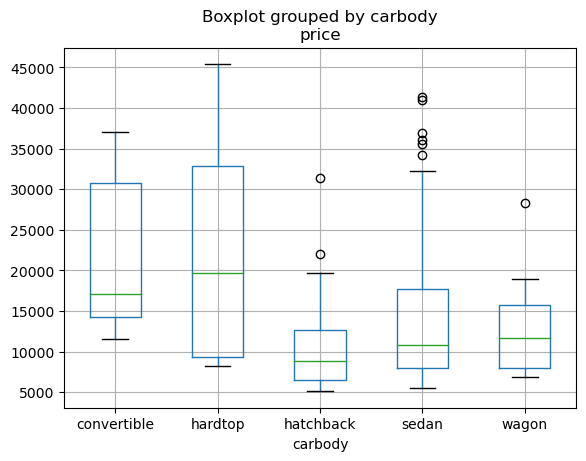

In [79]:
plt.figure()
data.boxplot('price', 'carbody')

<AxesSubplot:xlabel='carbody', ylabel='count'>

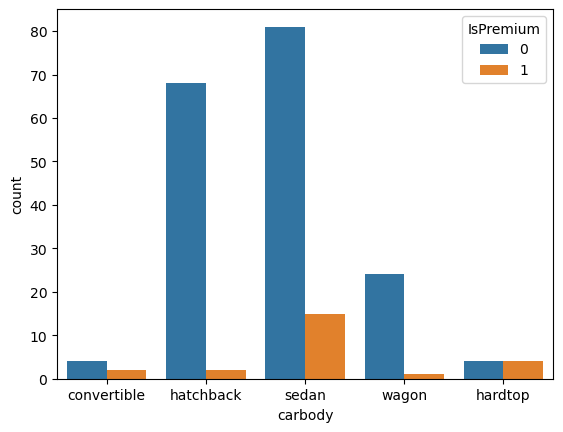

In [80]:
sns.countplot('carbody', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='enginetype'>

<Figure size 640x480 with 0 Axes>

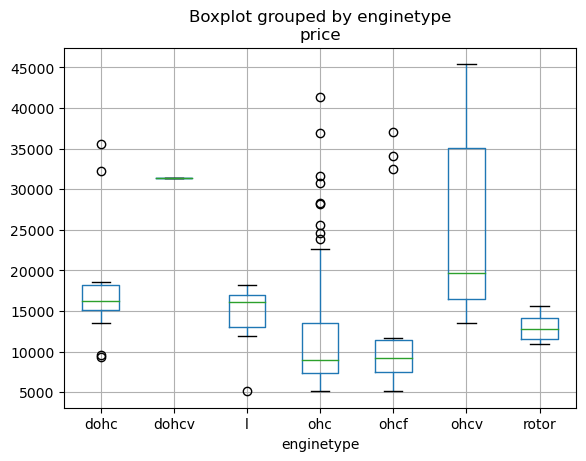

In [81]:
plt.figure()
data.boxplot('price', 'enginetype')

<AxesSubplot:xlabel='enginetype', ylabel='count'>

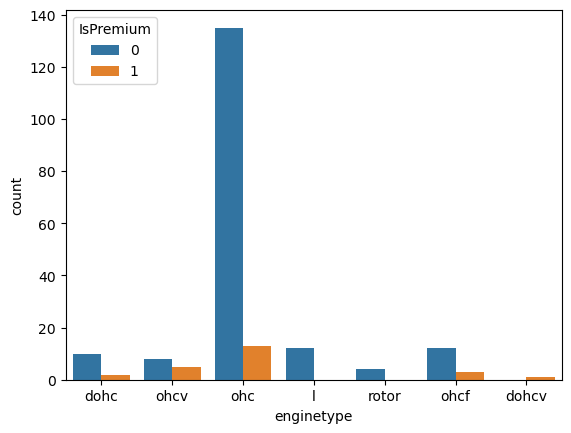

In [82]:
sns.countplot('enginetype', hue='IsPremium', data=data)

<AxesSubplot:title={'center':'price'}, xlabel='cylindernumber'>

<Figure size 640x480 with 0 Axes>

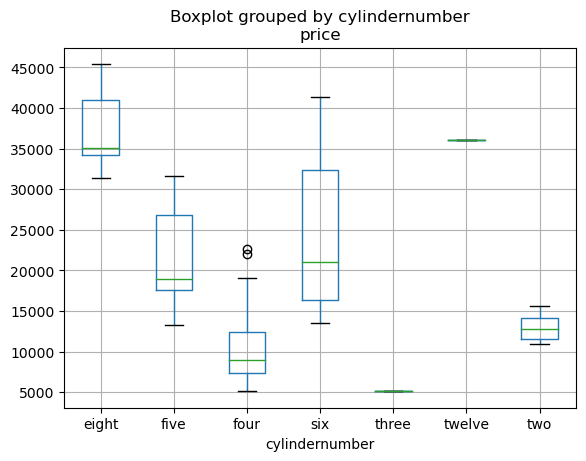

In [83]:
plt.figure()
data.boxplot('price', 'cylindernumber')

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

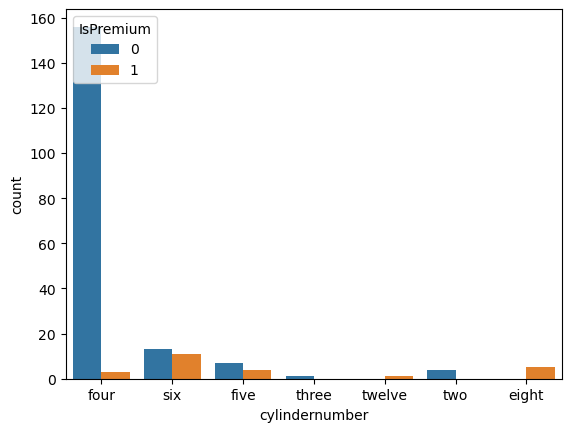

In [84]:
sns.countplot('cylindernumber', hue='IsPremium', data=data)

Выводы:
- symboling: не слишком понятно, что данный признак означает, интересных зависимостей также не видно. Исключим данный признак.
- doornumber: Количество дверей автомобиля и с точки зрения здравого смысла не должно само по себе влиять на его цену. Полученный график это подтверждает: самые дорогие модели могут быть как четырехдверными, так и двухдверными, с примерно одинаковой вероятностью. Из конечной выборки данный признак исключим.
- fueltype: Замечаем, что все самые дорогие модели используют бензин в качестве топлива. Однако, в то же время, подавляющее большинство автомобилей ездят на бензине, а дизельные модели встречаются и у премиальных брендов. Исключим данный признак.
- aspiration: Аналогично, практически у всех самых дорогих моделей стоят безнаддувные двигатели (std), но турбодвигатели и в целом встречаются реже. Также исключим данный признак.
- enginelocation: Исключаем данный признак, поскольку моделей с двигаетелем сзади в нашей выборке слишком мало.
- drivewheel: Все самые дорогие модели заднеприводные, причем заднеприводные автомобили встречаются достаточно часто. Полноприводных автомобилей в выборке в целом слишком мало, и цены у них различные. Преобразуем данный признак в бинарный.
- fuelsystem: Данный признак кажется интересным. Во-первых, выясняем, что 'bbl' -- это карбюраторы, 'fi', 'di' -- инжекторные системы. Далее, видим, что автомобилей с карбюраторами примерно столько же, сколько и с инжекторами, но при этом они практически все стоят меньше 10000 единиц. Инжекторы же стоят только на дорогих моделях, в том числе и премиальных. Преобразуем данный признак в бинарный: он может помочь отделить автомобили самой низкой ценовой категории.  
- carbody: Кабриолеты явно стоят дороже, но их слишком мало в выборке, чтобы данное заключение было объективным. Тем не менее, можем попробовать с помощью признака 'количество дверей' свести его к бинарному 'седан -- хэтчбэк'.
- enginetype: На подавляющем числе автомобилей стоит двигатель типа 'ohc', при этом премиальные модели встречаются примерно в одинаковом соотношении среди всех типов. Исключаем данный признак из выборки.
- cylindernumber: Можно выделить зависимость: если у автомобиля много цилиндров, то он, вероятнее всего, не может быть недорогим. С другой стороны, двух- трех- и четырехцилиндровые двигатели мы видим только на относительно недорогих моделях. Преобразуем этот признак в количественный явным образом, а потом посмотрим, с чем он коррелирует. 

Сделаем описанные преобразования (также удалим id автомобиля, название модели и марку):

In [85]:
data.drop(['car_ID', 'CarName', 'Brand', 'symboling', 'fueltype', 'aspiration', 'enginelocation', 'enginetype'], axis=1, inplace=True)

In [86]:
def updateCarBody(d):
    carbody = d['carbody']
    doornumber = d['doornumber']
    if carbody == 'convertible':
        return 0
    elif carbody == 'wagon':
        return 1
    elif carbody == 'sedan':
        return 0
    elif carbody == 'hatchback':
        return 1
    elif carbody == 'hardtop' and doornumber == 'two':
        return 0
    else:
        return 1
data['carbody'] = data.apply(updateCarBody, axis=1)

In [87]:
data['cylindernumber'].replace(['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], [2, 3, 4, 5, 6, 8, 12], inplace=True)

In [88]:
data['fuelsystem'].replace(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'], [0, 0, 0, 1, 1, 1, 1, 1], inplace=True)

In [89]:
data['rwd'] = data['drivewheel'].map(lambda s: 1 if s == 'rwd' else 0)
data.drop(['drivewheel', 'doornumber'],axis=1, inplace=True)

In [90]:
data.head()

,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,IsPremium,rwd
0,0,88.6,168.8,64.1,48.8,2548,4,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,0,88.6,168.8,64.1,48.8,2548,4,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,1,94.5,171.2,65.5,52.4,2823,6,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,0,99.8,176.6,66.2,54.3,2337,4,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0
4,0,99.4,176.6,66.4,54.3,2824,5,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0


## Анализ корреляции

Теперь все признаки количественные. Итак, посмотрим на корреляцию:

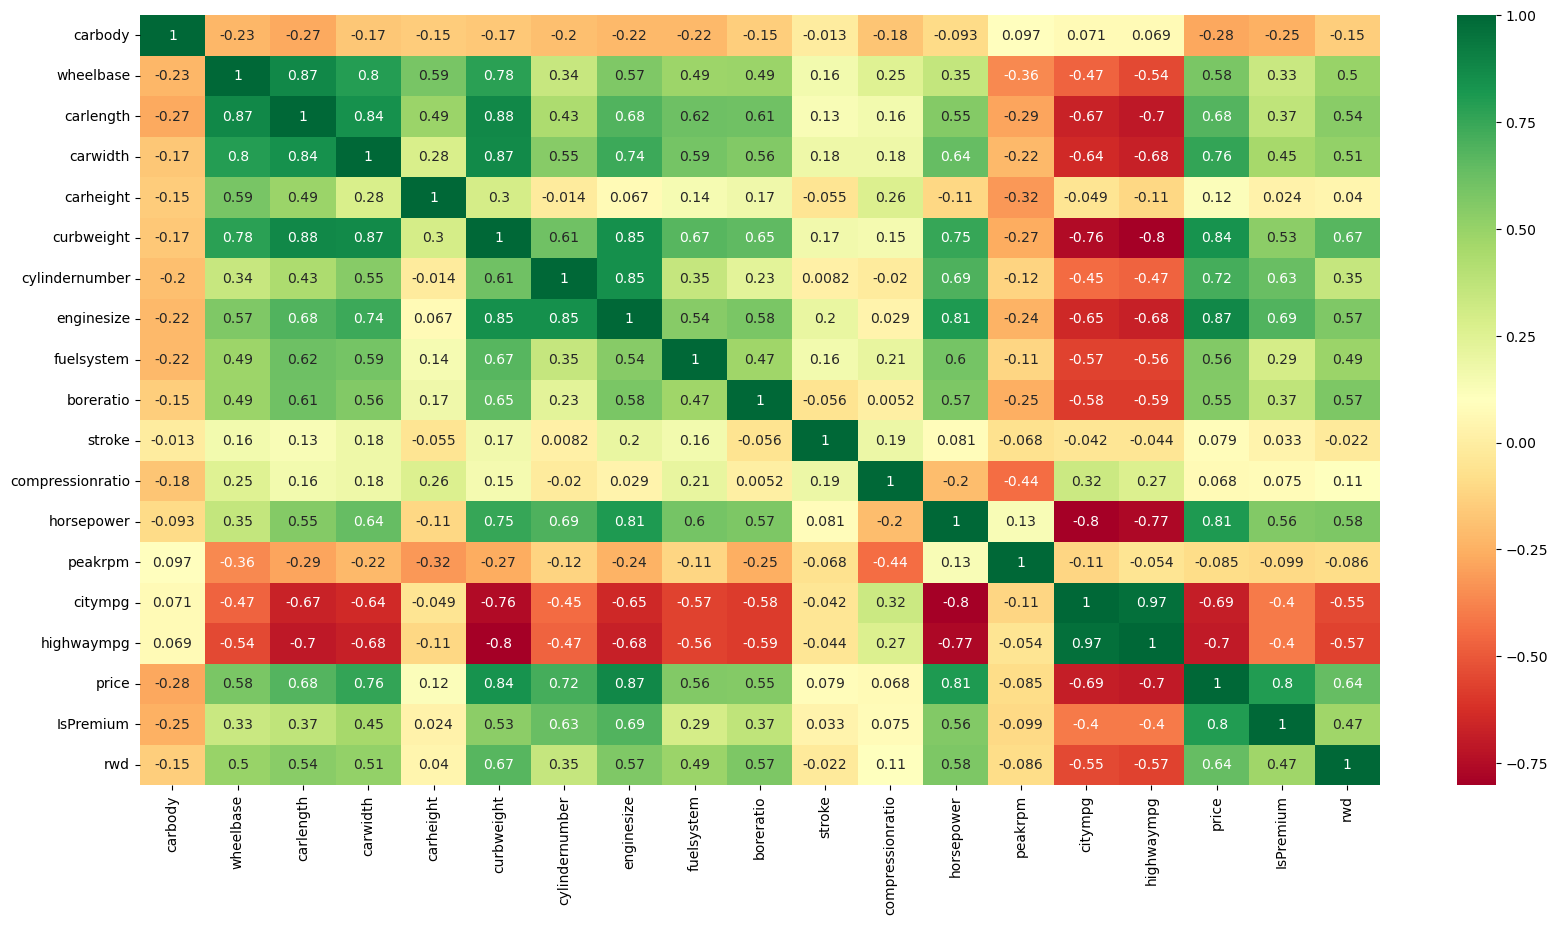

In [92]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

- преобразованный признак carbody ничего не дал, удаляем его из выборки
- аналогично, не видим достаточной корреляции для признаков carheight, stroke, peakrpm и compressionratio

Удалим данные признаки

In [93]:
data.drop(['carbody', 'carheight', 'stroke', 'peakrpm', 'compressionratio'], axis=1, inplace=True)

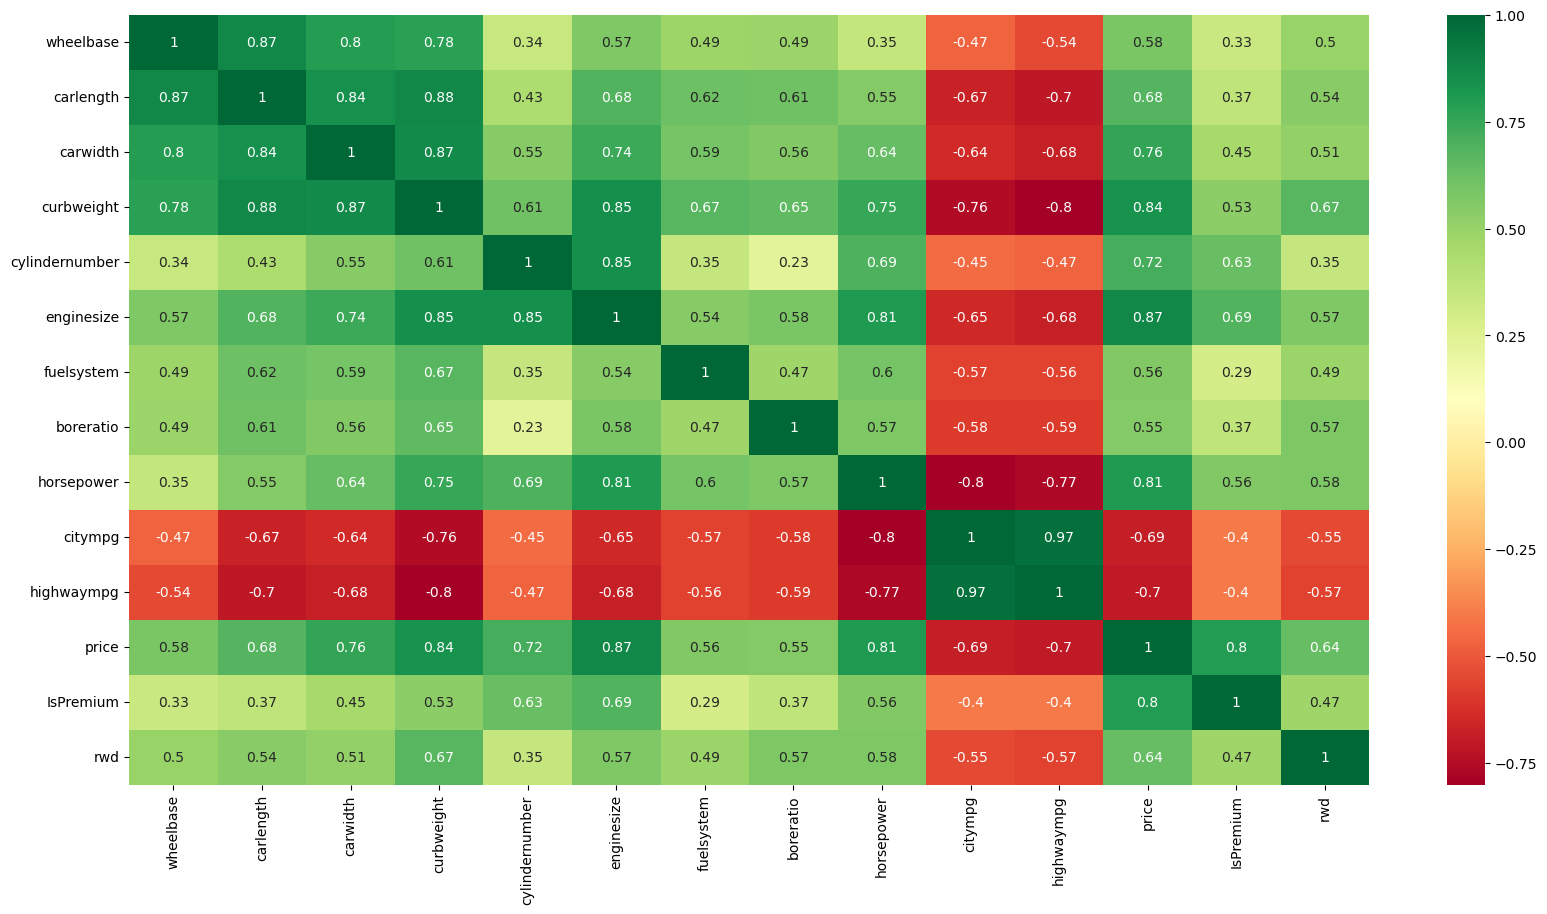

In [94]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

- Заметна высокая корреляция между габаритами автомобиля и его весом, поэтому удалим признаки carlength, carwidth и wheelbase. И в целом, кажется странным искать зависимость между размерами автомобиля и его ценой.
- В свою очередь, размер двигателя сильно зависит от веса автомобиля. Удалим и вес, судить по весу автомобиля о его цене тоже странно: вес влечет затраты на двигатель, а это уже влияет на стоимость.
- highwaympg и citympg очень сильно коррелируют, оставим, например, только citympg

In [95]:
data.drop(['carlength', 'carwidth', 'wheelbase', 'curbweight', 'highwaympg'], axis=1, inplace=True)

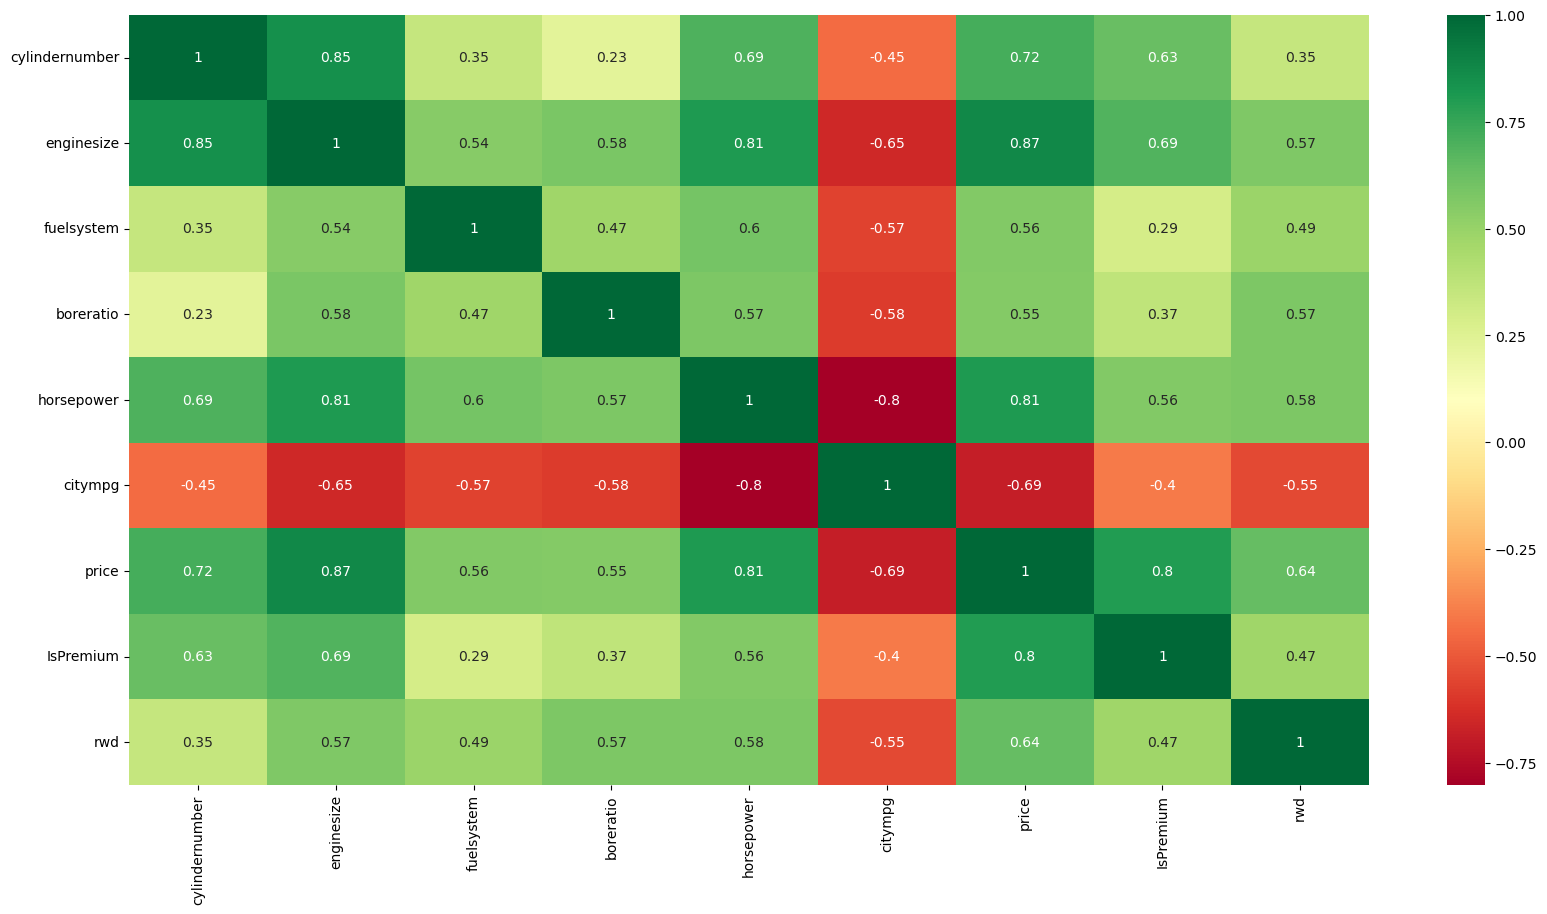

In [96]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

- Теперь также видим, что количество цилиндров сильно зависит от размера двигателя, и поэтому исключаем также и его

In [97]:
data.drop(['cylindernumber'], axis=1, inplace=True)

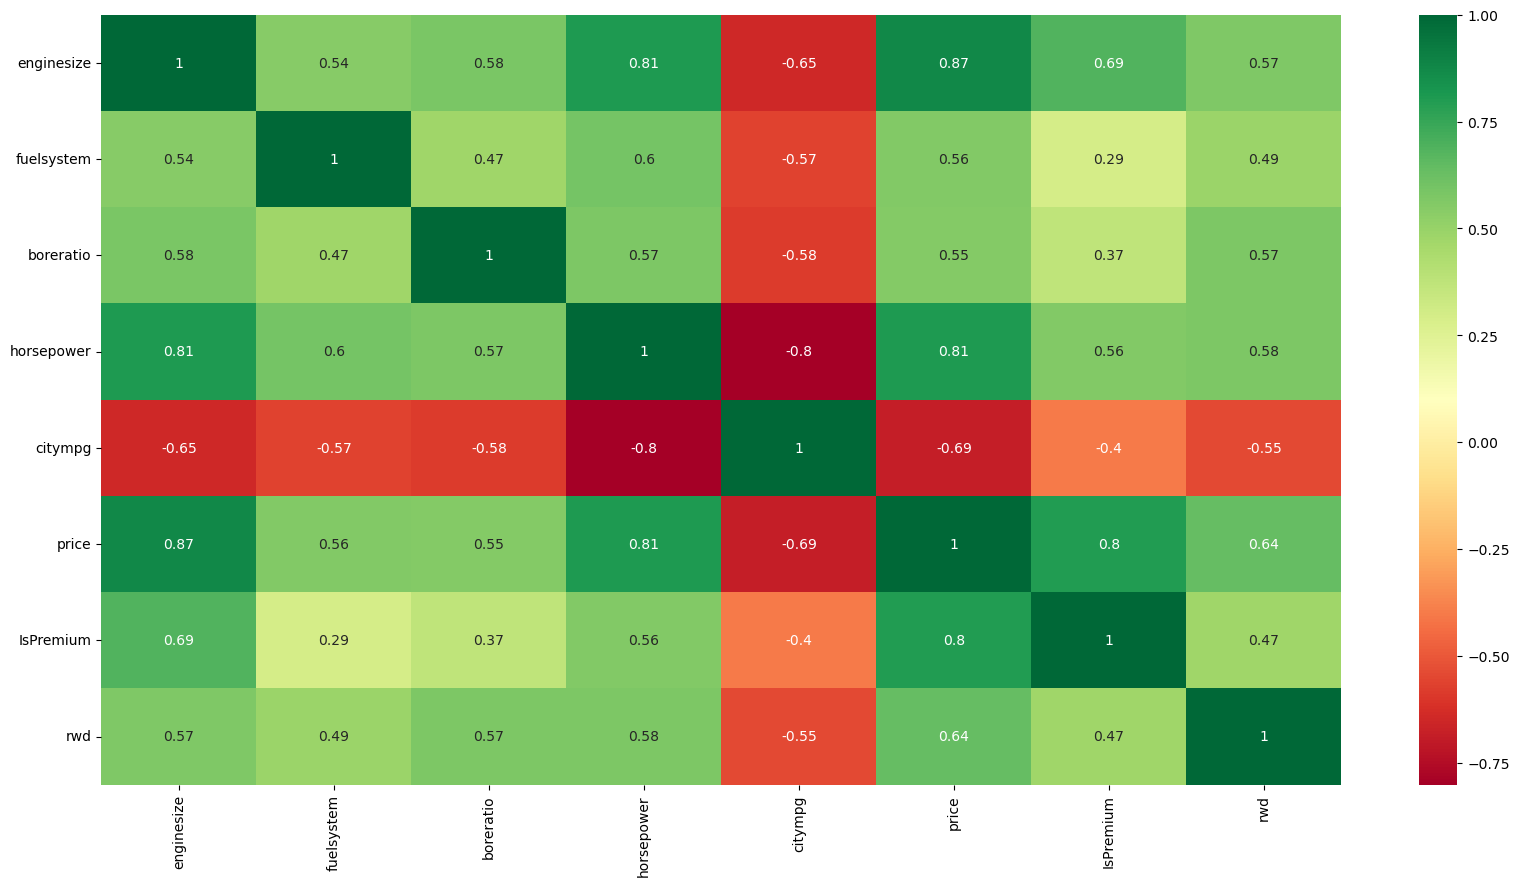

In [98]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

# 2. Обучение модели

Нормализуем данные:

In [99]:
data = (data - data.min()) / (data.max() - data.min())

In [100]:
data.head(100)

,enginesize,fuelsystem,boreratio,horsepower,citympg,price,IsPremium,rwd
0,0.260377,1.0,0.664286,0.262500,0.222222,0.207959,0.0,1.0
1,0.260377,1.0,0.664286,0.262500,0.222222,0.282558,0.0,1.0
2,0.343396,1.0,0.100000,0.441667,0.166667,0.282558,0.0,1.0
3,0.181132,1.0,0.464286,0.225000,0.305556,0.219254,0.0,0.0
4,0.283019,1.0,0.464286,0.279167,0.138889,0.306142,0.0,0.0
...,...,...,...,...,...,...,...,...
95,0.135849,0.0,0.435714,0.087500,0.500000,0.066556,0.0,0.0
96,0.135849,0.0,0.435714,0.087500,0.500000,0.059108,0.0,0.0
97,0.135849,0.0,0.435714,0.087500,0.500000,0.071521,0.0,0.0
98,0.135849,0.0,0.435714,0.087500,0.500000,0.077727,0.0,0.0


In [101]:
from numpy import linalg
import math

def gradientDescent(X: np.array, Y : np.array, initial_w: np.array, step_function, stop_criterion) -> np.array:
    i = 1
    current_w = initial_w
    new_w = initial_w
    w = initial_w
    current_gradient = np.ones(X.size)
    n = len(X)
    while True:
        current_prediction = X.dot(current_w)
        error = current_prediction - Y
        current_gradient = 2 * X.T.dot(error) / n
        new_w = current_w - step_function(i) * current_gradient
        if stop_criterion(i, current_w, new_w, current_gradient):
            return new_w
        i += 1
        current_w = new_w

def step(i):
    return 1.0 / i

epsilon = 0.000001

def stopCriterion(i, w0, w1, g):
    if i == 1:
        return False
    else:
        return linalg.norm(w1 - w0) < epsilon

def addOnesColumn(X):
    ones = np.ones((X.shape[0],1))  
    return np.hstack((X, ones))

def myLinearRegression(X, y):
    X = addOnesColumn(X)
    return gradientDescent(X, y, np.zeros(X.shape[1]), step, stopCriterion)

def predict(X, weights):
    return X.dot(weights)

def MSE(ground_truth, prediction):
    return (np.square(ground_truth - prediction).mean())
    
def RMSE(ground_truth, prediction):
    return math.sqrt(MSE(ground_truth, prediction))

def R_squared(ground_truth, prediction):
    res = np.square(ground_truth - prediction).sum()
    tot = np.square(ground_truth - ground_truth.mean()).sum()
    return 1.0 - res / tot

def evaluateMetrics(X, y, weights):
    X = addOnesColumn(X)
    prediction = predict(X, weights)
    mse = MSE(y, prediction)
    rmse = math.sqrt(mse)
    r_sq = R_squared(y, prediction)
    return mse, rmse, r_sq

## Обучение без кросс-валидации:

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y = data['price']
X = data.drop(columns=['price'])
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train_p.to_numpy()
X_test = X_test_p.to_numpy()
y_train = y_train_p.to_numpy()
y_test = y_test_p.to_numpy()

weights = myLinearRegression(X_train, y_train)
train_mse, train_rmse, train_r_sq = evaluateMetrics(X_train, y_train, weights)
test_mse, test_rmse, test_r_sq = evaluateMetrics(X_test, y_test, weights)

model = Ridge()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("MSE (train): ", train_mse)
print("RMSE (train): ", train_rmse)
print("R^2 (train): ", train_r_sq)

print("---")

print("MSE (test): ", test_mse)
print("RMSE (test): ", test_rmse)
print("R^2 (test): ", test_r_sq)

print("---")

print("MSE (train, sklearn): ", mean_squared_error(y_train, y_train_pred, squared=True))
print("RMSE (train, sklearn): ",  mean_squared_error(y_train, y_train_pred, squared=False))
print("R^2 (train, sklearn): ", r2_score(y_train, y_train_pred))

print("---")

print("MSE (test, sklearn): ", mean_squared_error(y_test, y_test_pred, squared=True))
print("RMSE (test, sklearn): ",  mean_squared_error(y_test, y_test_pred, squared=False))
print("R^2 (test, sklearn): ", r2_score(y_test, y_test_pred))

MSE (train):  0.005737564641060292
RMSE (train):  0.07574671373109391
R^2 (train):  0.8472509001625406
---
MSE (test):  0.005277078985894922
RMSE (test):  0.07264350615089364
R^2 (test):  0.8764108576072416
---
MSE (train, sklearn):  0.004686196556935172
RMSE (train, sklearn):  0.06845580002406788
R^2 (train, sklearn):  0.875241090860988
---
MSE (test, sklearn):  0.00485367073712392
RMSE (test, sklearn):  0.06966829075787578
R^2 (test, sklearn):  0.8863270749857377


## Обучение с кросс-валидацией:

In [108]:
from sklearn.model_selection import KFold

y = data['price'].to_numpy()
X = data.drop(columns=['price']).to_numpy()

table_data = { '': ['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'] }
table_data_sklearn = { '': ['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'] }

kf = KFold(n_splits=5, random_state=None, shuffle=True)
fold_i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    weights = myLinearRegression(X_train, y_train)
    train_mse, train_rmse, train_r_sq = evaluateMetrics(X_train, y_train, weights)
    test_mse, test_rmse, test_r_sq = evaluateMetrics(X_test, y_test, weights)
    
    table_data['Fold' + str(fold_i)] = [train_mse, test_mse, train_rmse, test_rmse,  train_r_sq, test_r_sq]
    
    model = Ridge()

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    table_data_sklearn['Fold' + str(fold_i)] = [
        mean_squared_error(y_train, y_train_pred, squared=True),
        mean_squared_error(y_test, y_test_pred, squared=True),
        mean_squared_error(y_train, y_train_pred, squared=False),
        mean_squared_error(y_test, y_test_pred, squared=False),
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ]
    
    fold_i += 1

table_df = pd.DataFrame(data=table_data)
table_df['E'] = table_df.drop(columns=table_df.columns[0], axis=1).mean(axis=1)
table_df['STD'] = table_df.drop(columns=table_df.columns[0], axis=1).std(axis=1)


table_df_sklearn = pd.DataFrame(data=table_data_sklearn)
table_df_sklearn['E'] = table_df_sklearn.drop(columns=table_df_sklearn.columns[0], axis=1).mean(axis=1)
table_df_sklearn['STD'] = table_df_sklearn.drop(columns=table_df_sklearn.columns[0], axis=1).std(axis=1)


In [109]:
table_df.head()

,,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
0,mse-train,0.005244,0.004900,0.005889,0.005452,0.005929,0.005483,0.000390
1,mse-test,0.007252,0.007332,0.003305,0.008511,0.003247,0.005929,0.002212
2,rmse-train,0.072417,0.070002,0.076742,0.073837,0.077002,0.074000,0.002647
3,rmse-test,0.085159,0.085625,0.057487,0.092257,0.056981,0.075502,0.015126
4,r2-train,0.867822,0.875102,0.864247,0.832680,0.853914,0.858753,0.014717


In [110]:
table_df_sklearn.head()

,,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
0,mse-train,0.004264,0.004183,0.004874,0.004439,0.004883,0.004529,0.000297
1,mse-test,0.006222,0.006578,0.003231,0.005999,0.003162,0.005038,0.001515
2,rmse-train,0.065300,0.064680,0.069811,0.066623,0.069882,0.067259,0.002204
3,rmse-test,0.078877,0.081106,0.056843,0.077451,0.056233,0.070102,0.011138
4,r2-train,0.892527,0.893372,0.887660,0.863777,0.879681,0.883403,0.010953


## Выводы:
- Получилось обучить достаточно качественную модель, получены хорошие метрики на всех фолдах
- Метрики, полученные на моделях, обученных с помощью реализованного градиентного спуска, сопоставимы с метриками, полученными при обучении sklearn